In [1]:
from bs4 import BeautifulSoup
import pandas as pd
import requests 
import time

df = pd.DataFrame(columns=['Title', 'Link', 'Text'])
art = pd.DataFrame(columns=['Text'])

def get_article_text(url):
    response = requests.get(url)

    if response.status_code == 200:
        soup = BeautifulSoup(response.text, 'html.parser')
        paragraphs = soup.find_all('p')
        article_text = ' '.join([p.get_text() for p in paragraphs])
        return article_text
    else:
        return f"Ошибка при получении страницы. Код ответа: {response.status_code}"
    
# Инициализация DataFrame
df = pd.DataFrame(columns=['Title', 'Link'])
art = pd.DataFrame(columns=['Text'])

# Цикл для итерации по страницам
max_retries = 3

for i in range(1, 5):
    m = str(i)
    url = 'https://7days.ru/news/' + m + '.htm'

    for attempt in range(max_retries):
        try:
            response = requests.get(url)
            response.raise_for_status()
            time.sleep(1)
            break  # Выход из цикла при успешном запросе
        except requests.exceptions.RequestException as e:
            print(f"Произошла ошибка при запросе {url}: {e}")
            if attempt < max_retries - 1:
                time.sleep(5)  # Подождите перед повторной попыткой
                continue
            else:
                print(f"Не удалось выполнить запрос {max_retries} раза. Прекращаем попытки.")
                break

    data = BeautifulSoup(response.text, 'html.parser')

    for article in data.find_all('a', class_='base-material-7days__item_href'):
        title = article.text
        link = url + article['href']
        try:
            article_text = get_article_text(link)
            df = pd.concat([df, pd.DataFrame({'Title': [title], 'Link': [link], 'Text': [article_text]})], ignore_index=True)
        except:
            continue
        link = ''
        
    
    url = ''


print(df)


/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


                                                Title  \
0   «Очень интересный мужчина»: выяснилось, от ког...   
1   Много набрала: недавно родившая Брухунова поте...   
2   Хрусталев огорошил признанием о тайной дочке —...   
3   Тутберидзе напала на Тарасову за публичное обв...   
4   Неожиданно: стало известно, кому достались ден...   
5   Грязь вместо цветов: публику потрясли кадры с ...   
6   «Другая реальность»: Костомаров подробно описа...   
7   Канцерогенная бомба: диетолог объяснил, на как...   
8   Зависть замучила? Бородина разнесла звезд, худ...   
9   Не только Путин: россияне назвали ТОП самых уз...   
10  «Уберите бабушку со сцены»: появление отмененн...   
11  Гастроэнтеролог: при запорах нужно пить кефир,...   
12  Муж Королевой высказался о пробившемся на эстр...   
13  Петросян подтвердил рождение дочери — заговори...   
14  Сын Орбакайте показал отношение к скандалу в с...   
15  Радовалась она недолго: Меган Маркл уличили в ...   
16  Брухунова рассекретила дочк

In [2]:
df.head()

,Title,Link,Text
0,"«Очень интересный мужчина»: выяснилось, от ког...",https://7days.ru/news/1.htm/news/ochen-interes...,Ольга Бузова недавно вышла в свет с кольцом на...
1,Много набрала: недавно родившая Брухунова поте...,https://7days.ru/news/1.htm/news/mnogo-nabrala...,В день своего 35-летия Татьяна Брухунова подел...
2,Хрусталев огорошил признанием о тайной дочке —...,https://7days.ru/news/1.htm/news/khrustalev-og...,Дмитрий Хрусталев крайне редко соглашается общ...
3,Тутберидзе напала на Тарасову за публичное обв...,https://7days.ru/news/1.htm/news/tutberidze-na...,Очередной громкий скандал разгорается в россий...
4,"Неожиданно: стало известно, кому достались ден...",https://7days.ru/news/1.htm/news/neozhidanno-s...,"К тому\nвремени, когда осенью минувшего года в..."


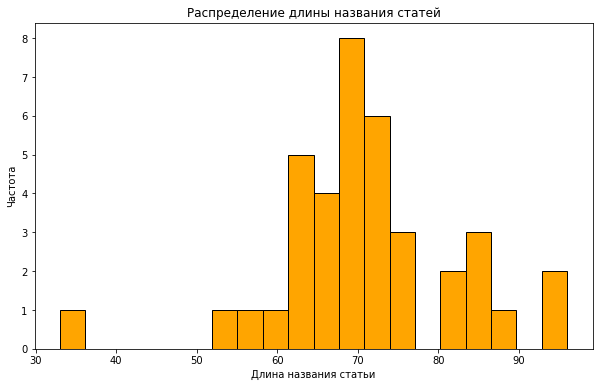

In [3]:
import matplotlib.pyplot as plt
# Удаление NaN значений и подсчет длины текстов
df['Title_Length'] = df['Title'].str.len()
df.dropna(subset=['Title_Length'], inplace=True)

# Построение гистограммы
plt.figure(figsize=(10, 6))
plt.hist(df['Title_Length'], bins=20, color='orange', edgecolor='black')
plt.title('Распределение длины названия статей')
plt.xlabel('Длина названия статьи')
plt.ylabel('Частота')
plt.show()


In [4]:
# Добавление колонок с длиной статьи в символах и словах
df['Text Length (Characters)'] = df['Text'].apply(lambda x: len(str(x)))
df['Text Length (Words)'] = df['Text'].apply(lambda x: len(str(x).split()))

# Вывод данных
print(df)


                                                Title  \
0   «Очень интересный мужчина»: выяснилось, от ког...   
1   Много набрала: недавно родившая Брухунова поте...   
2   Хрусталев огорошил признанием о тайной дочке —...   
3   Тутберидзе напала на Тарасову за публичное обв...   
4   Неожиданно: стало известно, кому достались ден...   
5   Грязь вместо цветов: публику потрясли кадры с ...   
6   «Другая реальность»: Костомаров подробно описа...   
7   Канцерогенная бомба: диетолог объяснил, на как...   
8   Зависть замучила? Бородина разнесла звезд, худ...   
9   Не только Путин: россияне назвали ТОП самых уз...   
10  «Уберите бабушку со сцены»: появление отмененн...   
11  Гастроэнтеролог: при запорах нужно пить кефир,...   
12  Муж Королевой высказался о пробившемся на эстр...   
13  Петросян подтвердил рождение дочери — заговори...   
14  Сын Орбакайте показал отношение к скандалу в с...   
15  Радовалась она недолго: Меган Маркл уличили в ...   
16  Брухунова рассекретила дочк

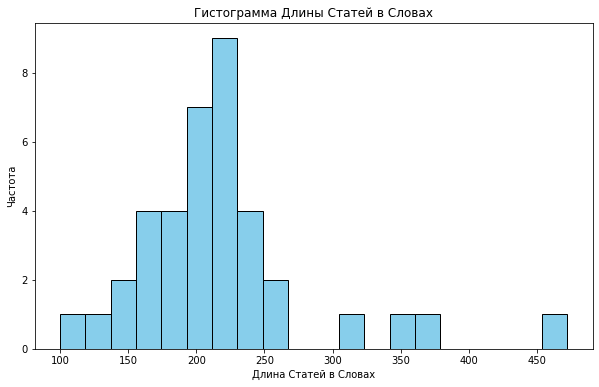

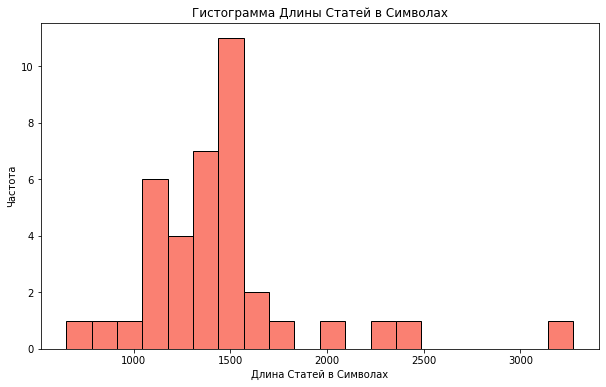

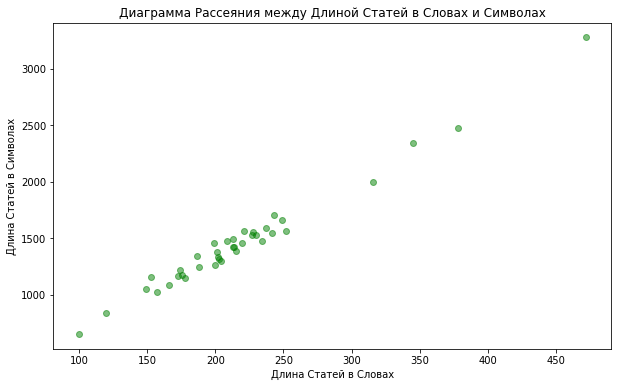

In [5]:
import matplotlib.pyplot as plt

# Построение гистограммы длины статей в словах
plt.figure(figsize=(10, 6))
plt.hist(df['Text Length (Words)'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гистограмма Длины Статей в Словах')
plt.xlabel('Длина Статей в Словах')
plt.ylabel('Частота')
plt.show()

# Построение гистограммы длины статей в символах
plt.figure(figsize=(10, 6))
plt.hist(df['Text Length (Characters)'], bins=20, color='salmon', edgecolor='black')
plt.title('Гистограмма Длины Статей в Символах')
plt.xlabel('Длина Статей в Символах')
plt.ylabel('Частота')
plt.show()

# Диаграмма рассеяния между длиной статей в словах и символах
plt.figure(figsize=(10, 6))
plt.scatter(df['Text Length (Words)'], df['Text Length (Characters)'], color='green', alpha=0.5)
plt.title('Диаграмма Рассеяния между Длиной Статей в Словах и Символах')
plt.xlabel('Длина Статей в Словах')
plt.ylabel('Длина Статей в Символах')
plt.show()


In [6]:
df.head()

,Title,Link,Text,Title_Length,Text Length (Characters),Text Length (Words)
0,"«Очень интересный мужчина»: выяснилось, от ког...",https://7days.ru/news/1.htm/news/ochen-interes...,Ольга Бузова недавно вышла в свет с кольцом на...,66,1245,188
1,Много набрала: недавно родившая Брухунова поте...,https://7days.ru/news/1.htm/news/mnogo-nabrala...,В день своего 35-летия Татьяна Брухунова подел...,69,1296,204
2,Хрусталев огорошил признанием о тайной дочке —...,https://7days.ru/news/1.htm/news/khrustalev-og...,Дмитрий Хрусталев крайне редко соглашается общ...,65,1336,202
3,Тутберидзе напала на Тарасову за публичное обв...,https://7days.ru/news/1.htm/news/tutberidze-na...,Очередной громкий скандал разгорается в россий...,86,1217,174
4,"Неожиданно: стало известно, кому достались ден...",https://7days.ru/news/1.htm/news/neozhidanno-s...,"К тому\nвремени, когда осенью минувшего года в...",64,2000,316


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Title                     38 non-null     object
 1   Link                      38 non-null     object
 2   Text                      38 non-null     object
 3   Title_Length              38 non-null     int64 
 4   Text Length (Characters)  38 non-null     int64 
 5   Text Length (Words)       38 non-null     int64 
dtypes: int64(3), object(3)
memory usage: 1.9+ KB


In [8]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [9]:
from sklearn.svm import LinearSVC

In [10]:
data_test = pd.read_csv("news 2 (1).csv")

In [11]:
data_test.head()

,text,label
0,Помощник депутата Палаты представителей: мы да...,1
1,"Вы когда-нибудь чувствовали, что ваша жизнь дв...",0
2,Почему правда может привести к увольнению 29 о...,1
3,"Выявлено 15 мирных жителей, погибших в результ...",1
4,Распечатать\nИранская женщина была приговорена...,1


In [12]:
X, y = data_test['text'], data_test['label']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [14]:
X_train

2012     ИГИЛ уничтожил танк M1A Abrams американской ра...
11107    Триша и Гарт не были женаты до 2005 года. Это ...
14080    В воскресенье в программе «Встреча с прессой» ...
6602     Отец Майкла Брауна обвинил город Фергюсон в то...
1441     Главная › ВИДЕО › РЕЧЬ ПИТЕРА ТИЛЯ В НАЦИОНАЛЬ...
                               ...                        
12688    В течение нескольких месяцев спикер Пол Д. Рай...
3733     PaulCraigRoberts.org 29 октября 2016 г.\nТепер...
12713    ЛОНДОН. В среду нападавший на внедорожнике сби...
8170     COLONIA BERLIN, Bolivia  —   A few months ago,...
4070     БУМ! Келлиэнн Конуэй закрывает бригаду Куомо Б...
Name: text, Length: 12000, dtype: object

In [15]:
url_stopwords_ru = "https://raw.githubusercontent.com/stopwords-iso/stopwords-ru/master/stopwords-ru.txt"

def get_text(url, encoding='utf-8', to_lower=True):
    url = str(url)
    if url.startswith('http'):
        r = requests.get(url)
        if not r.ok:
            r.raise_for_status()
        return r.text.lower() if to_lower else r.text
    elif os.path.exists(url):
        with open(url, encoding=encoding) as f:
            return f.read().lower() if to_lower else f.read()
    else:
        raise Exception('parameter [url] can be either URL or a filename')


def normalize_tokens(tokens):
    morph = pymorphy2.MorphAnalyzer()
    return [morph.parse(tok)[0].normal_form for tok in tokens]


def remove_stopwords(tokens, stopwords=None, min_length=4):
    if not stopwords:
        return tokens
    stopwords = set(stopwords)
    tokens = [tok
              for tok in tokens
              if tok not in stopwords and len(tok) >= min_length]
    return tokens


def tokenize_n_lemmatize(
    text, stopwords=None, normalize=True, 
    regexp=r'(?u)\b\w{4,}\b'):
    words = [w for sent in sent_tokenize(text)
             for w in regexp_tokenize(sent, regexp)]
    if normalize:
        words = normalize_tokens(words)
    if stopwords:
        words = remove_stopwords(words, stopwords)
    return words

stopwords_ru = get_text(url_stopwords_ru).splitlines()
# vectorizer = TfidfVectorizer(stop_words=stopwords_ru, max_df = 0.7)

In [16]:
vectorizer = TfidfVectorizer(stop_words=stopwords_ru, max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)  # Use transform instead of fit_transform for the test set

classifier = LinearSVC()
classifier.fit(X_train_vectorized, y_train)

accuracy = classifier.score(X_test_vectorized, y_test)
print(f"Точность: {accuracy}")

/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn(


Точность: 0.958


In [17]:
import pandas as pd

new_data = df['Text']

new_data_vectorized = vectorizer.transform(new_data)

predictions = classifier.predict(new_data_vectorized)

df['Predictions'] = predictions

print(df[['Title', 'Link', 'Text', 'Predictions']])


                                                Title  \
0   «Очень интересный мужчина»: выяснилось, от ког...   
1   Много набрала: недавно родившая Брухунова поте...   
2   Хрусталев огорошил признанием о тайной дочке —...   
3   Тутберидзе напала на Тарасову за публичное обв...   
4   Неожиданно: стало известно, кому достались ден...   
5   Грязь вместо цветов: публику потрясли кадры с ...   
6   «Другая реальность»: Костомаров подробно описа...   
7   Канцерогенная бомба: диетолог объяснил, на как...   
8   Зависть замучила? Бородина разнесла звезд, худ...   
9   Не только Путин: россияне назвали ТОП самых уз...   
10  «Уберите бабушку со сцены»: появление отмененн...   
11  Гастроэнтеролог: при запорах нужно пить кефир,...   
12  Муж Королевой высказался о пробившемся на эстр...   
13  Петросян подтвердил рождение дочери — заговори...   
14  Сын Орбакайте показал отношение к скандалу в с...   
15  Радовалась она недолго: Меган Маркл уличили в ...   
16  Брухунова рассекретила дочк

In [18]:
df.head()

,Title,Link,Text,Title_Length,Text Length (Characters),Text Length (Words),Predictions
0,"«Очень интересный мужчина»: выяснилось, от ког...",https://7days.ru/news/1.htm/news/ochen-interes...,Ольга Бузова недавно вышла в свет с кольцом на...,66,1245,188,1
1,Много набрала: недавно родившая Брухунова поте...,https://7days.ru/news/1.htm/news/mnogo-nabrala...,В день своего 35-летия Татьяна Брухунова подел...,69,1296,204,1
2,Хрусталев огорошил признанием о тайной дочке —...,https://7days.ru/news/1.htm/news/khrustalev-og...,Дмитрий Хрусталев крайне редко соглашается общ...,65,1336,202,1
3,Тутберидзе напала на Тарасову за публичное обв...,https://7days.ru/news/1.htm/news/tutberidze-na...,Очередной громкий скандал разгорается в россий...,86,1217,174,0
4,"Неожиданно: стало известно, кому достались ден...",https://7days.ru/news/1.htm/news/neozhidanno-s...,"К тому\nвремени, когда осенью минувшего года в...",64,2000,316,0


In [19]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

vectorizer = CountVectorizer(stop_words=stopwords_ru, max_df=0.7)
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

classifier = MultinomialNB()
classifier.fit(X_train_vectorized, y_train)

accuracy = classifier.score(X_test_vectorized, y_test)
print(f"Точность: {accuracy}")

/Users/ivansvininnikov/opt/anaconda3/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['хотел'] not in stop_words.
  warnings.warn(


Точность: 0.8013333333333333


In [20]:
import requests
from bs4 import BeautifulSoup

# URL страницы статьи на scienceopen.com
url = 'https://www.scienceopen.com/document/read?vid=7dcc5159-f2e5-4300-a24e-6c84e9b0b6be'

# Получение HTML-кода страницы
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Извлечение текста абзацев из HTML
paragraphs = []
for i, paragraph_tag in enumerate(soup.find_all('p')):
    paragraph_text = paragraph_tag.get_text(strip=True)
    paragraphs.append((i + 1, paragraph_text))  # (номер абзаца, текст абзаца)

# Вывод абзацев
for number, text in paragraphs:
    if len(text) > 100:
        print(f"Paragraph {number}: {text}")

Paragraph 1: Severe acute respiratory syndrome (SARS) is caused by a newly discovered coronavirus (SARS-CoV). No effective prophylactic or post-exposure therapy is currently available.
Paragraph 2: We report, however, that chloroquine has strong antiviral effects on SARS-CoV infection of primate cells. These inhibitory effects are observed when the cells are treated with the drug either before or after exposure to the virus, suggesting both prophylactic and therapeutic advantage. In addition to the well-known functions of chloroquine such as elevations of endosomal pH, the drug appears to interfere with terminal glycosylation of the cellular receptor, angiotensin-converting enzyme 2. This may negatively influence the virus-receptor binding and abrogate the infection, with further ramifications by the elevation of vesicular pH, resulting in the inhibition of infection and spread of SARS CoV at clinically admissible concentrations.
Paragraph 3: Chloroquine is effective in preventing the 

In [21]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Предположим, у вас есть датасет в формате CSV
dataset_path = 'fake_and_real_news_dataset-2.csv'
df = pd.read_csv(dataset_path, sep=',').dropna()
del df['idd']

# Извлечение текстов и меток из датасета
X = df['title'] + ' ' + df['text']
y = [1 if label == 'REAL' else 0 for label in df['label']]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация текстов с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Преобразование разреженной матрицы в массив numpy
X_train_tfidf_np = X_train_tfidf.toarray()
X_test_tfidf_np = X_test_tfidf.toarray()

# Создание нейронной сети
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_tfidf_np.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение нейронной сети
model.fit(X_train_tfidf_np, np.array(y_train), epochs=10, batch_size=1, verbose=1)

# Оценка точности модели на тестовых данных
y_pred_probs = model.predict(X_test_tfidf_np)
y_pred = (y_pred_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the neural network model: {accuracy}")

# Проход по новым текстам и определение фейковости и спорных моментов
new_text = "Новый текст для проверки фейковости"
new_text_tfidf = vectorizer.transform([new_text])

# Преобразование разреженной матрицы в массив numpy
new_text_tfidf_np = new_text_tfidf.toarray()

# Предсказание с использованием обученной модели
prediction = model.predict(new_text_tfidf_np)
is_fake = (prediction > 0.5).astype(int)[0][0] == 0  # Пример: если класс 0, считаем текст фейковым

print(f"Фейковость текста: {'Фейк' if is_fake else 'Настоящий'}")


Epoch 1/10
3674/3674 [==============================] - 45s 12ms/step - loss: 0.2562 - accuracy: 0.9105
Epoch 2/10
3674/3674 [==============================] - 45s 12ms/step - loss: 0.0516 - accuracy: 0.9848
Epoch 3/10
3674/3674 [==============================] - 45s 12ms/step - loss: 0.0144 - accuracy: 0.9976
Epoch 4/10
3674/3674 [==============================] - 45s 12ms/step - loss: 0.0055 - accuracy: 0.9981
Epoch 5/10
3674/3674 [==============================] - 45s 12ms/step - loss: 0.0027 - accuracy: 0.9989
Epoch 6/10
3674/3674 [==============================] - 47s 13ms/step - loss: 0.0011 - accuracy: 0.9997
Epoch 7/10
3674/3674 [==============================] - 45s 12ms/step - loss: 4.2611e-04 - accuracy: 1.0000
Epoch 8/10
3674/3674 [==============================] - 46s 12ms/step - loss: 0.0025 - accuracy: 0.9997
Epoch 9/10
3674/3674 [==============================] - 47s 13ms/step - loss: 4.5093e-04 - accuracy: 0.9997
Epoch 10/10
29/29 [==============================] - 0s 

In [22]:
text = """
Abstract

The increasing digitalization of innovation activities is reshaping how marketing organizations practice innovation, and, to date, little research has studied the data-driven innovation capability of marketing. Given the essential role played by B2B marketing departments in new product and service development, this paper takes an abductive approach to elucidate how the data-driven innovation capability of marketing can be constructed by identifying its constituent elements and underlying processes. It draws upon the existing literature on digital marketing capabilities applied to innovation and 17 in-depth interviews with B2B managers. The paper proposes a capability model for the data-driven innovation capability of marketing that articulates building blocks according to three major phases: (1) ideation, (2) analysis, and (3) deployment. It reveals the resources and competencies for operationalizing three successive routines to: (1) generate a knowledge ecosystem, (2) disseminate data-driven insights, and (3) design an answer. Each routine is facilitated by three distinct learning mechanisms that (1) capture, (2) articulate, and (3) codify, throughout the innovation phases. Furthermore, potential enablers and consequences are identified to offer an overall process-oriented framework. This study provides valuable guidance to marketing managers by determining the critical resources, routines, and learning mechanisms for engaging in data-driven innovation.

Introduction

“The road ahead is digital for innovation management, and there is no way back” (Wetzels, 2021). A root cause of this lies in the digitalization of firms (Cooper, 2021) impacting innovation practices in every industrial sector. Digitalization involves the use of digital technology to provide new value-creating and revenue-generating opportunities (Parida, Sjödin, & Reim, 2019). For example, digital technologies like clouds and platforms led Amazon to monetize its data as a strategic innovative product, provided through Amazon Web Services, for its business-to-business (B2B) customers. The company Hilti embeds the Internet of Things (IoT) when creating smart devices for its B2B customers in the construction industry, thus enabling it to customize users' application profiles to improve their operational performance by using the collected data.

Yet, in 2022, 40% of marketing organizations, of which two thirds are B2B, had still not been convinced to have the right systems in place for fully capturing insights to align with their marketing innovation roadmap (The CMO Survey, 2022). Leveraging marketing data remains a challenge, and marketers are in a constant search for tools, methods, resources, and capabilities that may help them to master and modernize their existing technologies to enhance business value. This is particularly so in the innovation field, where it is reported as the number one priority (Salesforce Research, 2022).

Marketing departments play a prominent role in developing data-driven innovation (DDI), which is described as a series of innovation processes that apply techniques (such as big data analytics) and technologies (e.g., machine learning, deep learning, and artificial intelligence) to extract meaningful value from data to generate innovative results (Sultana, Akter, & Kyriazis, 2022a). As the interface between the customer and the company (Day & Montgomery, 1999), marketers leverage knowledge-based capabilities, such as analytics, because they are linked to product innovation processes, thus allowing the extraction of meaningful insights to generate critical understanding of customer needs (Chandy, Hassan, & Mukherji, 2017).

Surprisingly, despite the evident impact of digitalization on firms' capabilities (Lenka, Parida, & Wincent, 2017), particularly in the realm of innovation activities, there is limited understanding of what constitutes digital marketing capabilities (DMC). These capabilities involve a company's ability to use digital technology-enabled processes to interact with customers and partners in a targeted, measurable, and integrated manner to create new value (McIntyre & Virzi, 2019; Sridhar & Fang, 2019; Wedel & Kannan, 2016). While digital marketing research has made strides in bridging the gap between the digitalization and marketing literature (Kannan & Li, 2017; Lamberton & Stephen, 2016; Yadav & Pavlou, 2014), few studies have investigated the competencies and mechanisms required for developing these capabilities, especially within the B2B context and for innovation purposes. This scarcity is remarkable, as researchers (Moorman & Day, 2016; Parida et al., 2019; Verhoef & Bijmolt, 2019) and practitioners (Galante, Moret, & Said, 2013; Sayre, Rastogi, Zwillenberg, Visser, & Sheerin, 2012) have urged scholars to explore the constituent elements of DMC.

Consequently, our research motivation is to unravel the construction process of the data-driven innovation capability (DDIC) of marketing within B2B firms. Despite their valuable contributions, the few empirical studies to address DMC are subject to at least four limitations. First, recent literature has taken a holistic approach to scrutinizing DMC (Herhausen, Miočević, Morgan, & Kleijnen, 2020; Homburg & Wielgos, 2022; Wang, 2020), but it has not directly focused on innovation as a specific conceptualization scope. Second, few studies have examined the necessary resources and underlying processes for establishing DDIC (Lenka et al., 2017; Mikalef, Pappas, Krogstie, & Giannakos, 2018; Sultana, Akter, & Kyriazis, 2022b; Sultana et al., 2022a), especially within the industrial context. Third, the research still lacks a thorough understanding of DDIC from a marketing analytics perspective (Cao, Duan, & El Banna, 2019; De Luca, Herhausen, Troilo, & Rossi, 2021). Lastly, to the best of our knowledge, no study has demonstrated a process orientation in the construction of DDIC of marketing, yet the operational and dynamic nature of marketing capabilities entails a need to understand how they are orchestrated (Morgan, Miočević, & Herhausen, 2019) for B2B firms.

Based on these identified B2B research gaps, we propose two research questions:
1.
How can a capability model be developed for DDIC of marketing in B2B firms?

2.
What resources and processes are required to develop DDIC of marketing?

First, our approach involves reviewing the existing literature on DMC to highlight the aforementioned research gaps and propose a theoretical capability model to frame the components and underlying mechanisms of DDIC of marketing. We then present our qualitative study, which entails 17 in-depth interviews spanning various sectors. Using an abductive approach, we combine interview data with relevant literature and theories on DMC and innovation, and conduct a thematic analysis. We expound our findings through a capability model encompassing phases, routines, resources, competencies, and learning mechanisms. We further identify enablers and consequences, incorporating them into a process-oriented framework to provide a comprehensive view of the DDIC of marketing. Lastly, we discuss theoretical and managerial implications, limitations, and future research directions.

From a theoretical perspective, this paper contributes to the literature on DMC in the B2B context by developing a capability model showing how marketing organizations can leverage digitalization for innovation. From a managerial perspective, it offers an inventory of key routines, resources, competencies, and learning mechanisms crucial for successfully implementing DDIC of marketing.

Section snippets

From digital marketing capabilities to data-driven innovation capability

We have identified some valuable contributions to DMC made by B2B marketing research, some of which have endeavored to analyze DMC from the marketing micro-level perspective by either connecting it to the innovation perspective or describing its components (Table 1).

Regarding the connection of DMC with the innovation theme, Cao et al. (2019) note that the use of big data advances the use of marketing analytics, with a resulting positive impact on marketing decision-making and

Research settings and sample selection

Innovation and capabilities topics are gaining the attention of researchers in qualitative marketing management research aimed at theory elaboration (Lindgreen, Di Benedetto, Thornton, & Geersbro, 2021). We opted for qualitative research as the suitable methodology and conducted 17 semi-structured interviews with experienced managers to: (1) evaluate capabilities and resources inventory of DDIC of marketing, (2) assess the predesigned process-oriented model, and (3) adjust, complete, and refine 

Findings

The findings indicate that DDIC of marketing is a strategic competency for B2B firms. Industrials install digital systems and processes to understand what is in the minds of end customers. By capturing current and future needs information, these systems and processes are aimed at developing more customer-centric operations to provide innovative solutions that fit end-consumer expectations, thus progressively transforming the company's value chain approach by shifting from a B2B to a

Discussion

This study heeds the call for better understanding of how B2B firms can build DDIC of marketing, and it provides evidence of a processual perspective of construction, including phases, routines, and learning mechanisms. We developed a capability model and overall process-oriented framework of DDIC of marketing through an abductive process based on an in-depth literature review complemented with interviews.

CRediT authorship contribution statement

Ludivine Ravat: Conceptualization, Data curation, Formal analysis, Investigation, Resources, Software, Visualization, Writing – original draft, Writing – review & editing, Methodology, Supervision, Validation. Aurélie Hemonnet-Goujot: Methodology, Resources, Supervision, Validation, Visualization, Writing – review & editing, Data curation. Sandrine Hollet-Haudebert: Data curation, Methodology, Resources, Supervision, Validation, Visualization, Writing – review & editing.


"""

In [23]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score

# Загрузка данных из CSV
dataset_path = 'fake_and_real_news_dataset-2.csv'
df = pd.read_csv(dataset_path, sep=',').dropna()
del df['idd']

# Извлечение текстов и меток из датасета
X = df['title'] + ' ' + df['text']
y = [1 if label == 'REAL' else 0 for label in df['label']]

# Разделение данных на тренировочный и тестовый наборы
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Векторизация текстов с использованием TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Преобразование разреженной матрицы в массив numpy
X_train_tfidf_np = X_train_tfidf.toarray()
X_test_tfidf_np = X_test_tfidf.toarray()

# Создание нейронной сети
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train_tfidf_np.shape[1],)),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Обучение нейронной сети
model.fit(X_train_tfidf_np, np.array(y_train), epochs=10, batch_size=1, verbose=1)

# Оценка точности модели на тестовых данных
y_pred_probs = model.predict(X_test_tfidf_np)
y_pred = (y_pred_probs > 0.5).astype(int)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of the neural network model: {accuracy}")

Epoch 1/10
3674/3674 [==============================] - 46s 12ms/step - loss: 0.2671 - accuracy: 0.9064
Epoch 2/10
3674/3674 [==============================] - 46s 13ms/step - loss: 0.0622 - accuracy: 0.9799
Epoch 3/10
3674/3674 [==============================] - 46s 13ms/step - loss: 0.0192 - accuracy: 0.9948
Epoch 4/10
3674/3674 [==============================] - 45s 12ms/step - loss: 0.0080 - accuracy: 0.9981
Epoch 5/10
3674/3674 [==============================] - 45s 12ms/step - loss: 0.0031 - accuracy: 0.9995
Epoch 6/10
3674/3674 [==============================] - 46s 13ms/step - loss: 0.0035 - accuracy: 0.9995
Epoch 7/10
3674/3674 [==============================] - 46s 12ms/step - loss: 0.0029 - accuracy: 0.9995
Epoch 8/10
3674/3674 [==============================] - 46s 12ms/step - loss: 0.0011 - accuracy: 0.9992
Epoch 9/10
3674/3674 [==============================] - 46s 13ms/step - loss: 4.0034e-04 - accuracy: 1.0000
Epoch 10/10
29/29 [==============================] - 0s 4ms/

In [24]:
# Проход по новым текстам и определение фейковости и спорных моментов
new_text = text
new_text_tfidf = vectorizer.transform([new_text])

# Преобразование разреженной матрицы в массив numpy
new_text_tfidf_np = new_text_tfidf.toarray()

# Предсказание с использованием обученной модели
predictions = model.predict(new_text_tfidf_np)

# Вывод результатов
for i, pred in enumerate(predictions):
    probability = pred[0]
    is_fake = (probability > 0.5).astype(int)
    print(f"Абзац {i + 1}: {'Фейк' if is_fake else 'Настоящий'} (Вероятность: {probability * 100:.2f}%)")

# Общий процент правдивости текста
total_probability = np.mean(predictions)
print(f"\nОбщий процент правдивости текста: {total_probability * 100:.2f}%")

1/1 [==============================] - 0s 23ms/step
Абзац 1: Настоящий (Вероятность: 0.01%)

Общий процент правдивости текста: 0.01%


## Exploring how to develop data-driven innovation capability of marketing within B2B firms: Toward a capability model and process-oriented approach
### https://www.sciencedirect.com/science/article/abs/pii/S0019850123002432

In [31]:
text = """
Abstract

The increasing digitalization of innovation activities is reshaping how marketing organizations practice innovation, and, to date, little research has studied the data-driven innovation capability of marketing. Given the essential role played by B2B marketing departments in new product and service development, this paper takes an abductive approach to elucidate how the data-driven innovation capability of marketing can be constructed by identifying its constituent elements and underlying processes. It draws upon the existing literature on digital marketing capabilities applied to innovation and 17 in-depth interviews with B2B managers. The paper proposes a capability model for the data-driven innovation capability of marketing that articulates building blocks according to three major phases: (1) ideation, (2) analysis, and (3) deployment. It reveals the resources and competencies for operationalizing three successive routines to: (1) generate a knowledge ecosystem, (2) disseminate data-driven insights, and (3) design an answer. Each routine is facilitated by three distinct learning mechanisms that (1) capture, (2) articulate, and (3) codify, throughout the innovation phases. Furthermore, potential enablers and consequences are identified to offer an overall process-oriented framework. This study provides valuable guidance to marketing managers by determining the critical resources, routines, and learning mechanisms for engaging in data-driven innovation.

Introduction

“The road ahead is digital for innovation management, and there is no way back” (Wetzels, 2021). A root cause of this lies in the digitalization of firms (Cooper, 2021) impacting innovation practices in every industrial sector. Digitalization involves the use of digital technology to provide new value-creating and revenue-generating opportunities (Parida, Sjödin, & Reim, 2019). For example, digital technologies like clouds and platforms led Amazon to monetize its data as a strategic innovative product, provided through Amazon Web Services, for its business-to-business (B2B) customers. The company Hilti embeds the Internet of Things (IoT) when creating smart devices for its B2B customers in the construction industry, thus enabling it to customize users' application profiles to improve their operational performance by using the collected data.

Yet, in 2022, 40% of marketing organizations, of which two thirds are B2B, had still not been convinced to have the right systems in place for fully capturing insights to align with their marketing innovation roadmap (The CMO Survey, 2022). Leveraging marketing data remains a challenge, and marketers are in a constant search for tools, methods, resources, and capabilities that may help them to master and modernize their existing technologies to enhance business value. This is particularly so in the innovation field, where it is reported as the number one priority (Salesforce Research, 2022).

Marketing departments play a prominent role in developing data-driven innovation (DDI), which is described as a series of innovation processes that apply techniques (such as big data analytics) and technologies (e.g., machine learning, deep learning, and artificial intelligence) to extract meaningful value from data to generate innovative results (Sultana, Akter, & Kyriazis, 2022a). As the interface between the customer and the company (Day & Montgomery, 1999), marketers leverage knowledge-based capabilities, such as analytics, because they are linked to product innovation processes, thus allowing the extraction of meaningful insights to generate critical understanding of customer needs (Chandy, Hassan, & Mukherji, 2017).

Surprisingly, despite the evident impact of digitalization on firms' capabilities (Lenka, Parida, & Wincent, 2017), particularly in the realm of innovation activities, there is limited understanding of what constitutes digital marketing capabilities (DMC). These capabilities involve a company's ability to use digital technology-enabled processes to interact with customers and partners in a targeted, measurable, and integrated manner to create new value (McIntyre & Virzi, 2019; Sridhar & Fang, 2019; Wedel & Kannan, 2016). While digital marketing research has made strides in bridging the gap between the digitalization and marketing literature (Kannan & Li, 2017; Lamberton & Stephen, 2016; Yadav & Pavlou, 2014), few studies have investigated the competencies and mechanisms required for developing these capabilities, especially within the B2B context and for innovation purposes. This scarcity is remarkable, as researchers (Moorman & Day, 2016; Parida et al., 2019; Verhoef & Bijmolt, 2019) and practitioners (Galante, Moret, & Said, 2013; Sayre, Rastogi, Zwillenberg, Visser, & Sheerin, 2012) have urged scholars to explore the constituent elements of DMC.

Consequently, our research motivation is to unravel the construction process of the data-driven innovation capability (DDIC) of marketing within B2B firms. Despite their valuable contributions, the few empirical studies to address DMC are subject to at least four limitations. First, recent literature has taken a holistic approach to scrutinizing DMC (Herhausen, Miočević, Morgan, & Kleijnen, 2020; Homburg & Wielgos, 2022; Wang, 2020), but it has not directly focused on innovation as a specific conceptualization scope. Second, few studies have examined the necessary resources and underlying processes for establishing DDIC (Lenka et al., 2017; Mikalef, Pappas, Krogstie, & Giannakos, 2018; Sultana, Akter, & Kyriazis, 2022b; Sultana et al., 2022a), especially within the industrial context. Third, the research still lacks a thorough understanding of DDIC from a marketing analytics perspective (Cao, Duan, & El Banna, 2019; De Luca, Herhausen, Troilo, & Rossi, 2021). Lastly, to the best of our knowledge, no study has demonstrated a process orientation in the construction of DDIC of marketing, yet the operational and dynamic nature of marketing capabilities entails a need to understand how they are orchestrated (Morgan, Miočević, & Herhausen, 2019) for B2B firms.

Based on these identified B2B research gaps, we propose two research questions:
1.
How can a capability model be developed for DDIC of marketing in B2B firms?

2.
What resources and processes are required to develop DDIC of marketing?

First, our approach involves reviewing the existing literature on DMC to highlight the aforementioned research gaps and propose a theoretical capability model to frame the components and underlying mechanisms of DDIC of marketing. We then present our qualitative study, which entails 17 in-depth interviews spanning various sectors. Using an abductive approach, we combine interview data with relevant literature and theories on DMC and innovation, and conduct a thematic analysis. We expound our findings through a capability model encompassing phases, routines, resources, competencies, and learning mechanisms. We further identify enablers and consequences, incorporating them into a process-oriented framework to provide a comprehensive view of the DDIC of marketing. Lastly, we discuss theoretical and managerial implications, limitations, and future research directions.

From a theoretical perspective, this paper contributes to the literature on DMC in the B2B context by developing a capability model showing how marketing organizations can leverage digitalization for innovation. From a managerial perspective, it offers an inventory of key routines, resources, competencies, and learning mechanisms crucial for successfully implementing DDIC of marketing.

Section snippets

From digital marketing capabilities to data-driven innovation capability

We have identified some valuable contributions to DMC made by B2B marketing research, some of which have endeavored to analyze DMC from the marketing micro-level perspective by either connecting it to the innovation perspective or describing its components (Table 1).

Regarding the connection of DMC with the innovation theme, Cao et al. (2019) note that the use of big data advances the use of marketing analytics, with a resulting positive impact on marketing decision-making and

Research settings and sample selection

Innovation and capabilities topics are gaining the attention of researchers in qualitative marketing management research aimed at theory elaboration (Lindgreen, Di Benedetto, Thornton, & Geersbro, 2021). We opted for qualitative research as the suitable methodology and conducted 17 semi-structured interviews with experienced managers to: (1) evaluate capabilities and resources inventory of DDIC of marketing, (2) assess the predesigned process-oriented model, and (3) adjust, complete, and refine 

Findings

The findings indicate that DDIC of marketing is a strategic competency for B2B firms. Industrials install digital systems and processes to understand what is in the minds of end customers. By capturing current and future needs information, these systems and processes are aimed at developing more customer-centric operations to provide innovative solutions that fit end-consumer expectations, thus progressively transforming the company's value chain approach by shifting from a B2B to a

Discussion

This study heeds the call for better understanding of how B2B firms can build DDIC of marketing, and it provides evidence of a processual perspective of construction, including phases, routines, and learning mechanisms. We developed a capability model and overall process-oriented framework of DDIC of marketing through an abductive process based on an in-depth literature review complemented with interviews.

CRediT authorship contribution statement

Ludivine Ravat: Conceptualization, Data curation, Formal analysis, Investigation, Resources, Software, Visualization, Writing – original draft, Writing – review & editing, Methodology, Supervision, Validation. Aurélie Hemonnet-Goujot: Methodology, Resources, Supervision, Validation, Visualization, Writing – review & editing, Data curation. Sandrine Hollet-Haudebert: Data curation, Methodology, Resources, Supervision, Validation, Visualization, Writing – review & editing.


"""

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Шаг 1: Подготовка данных
# Предположим, что у вас есть данные, представленные в виде списка текстов.


# Шаг 2: Предварительная обработка текста
# Векторизация текстов
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_tfidf = tfidf_vectorizer.fit_transform(texts)

# Шаг 3: Кластеризация текстов
# Инициализация и обучение модели k-means
num_clusters = 5  # количество кластеров
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_tfidf)

# Получение меток кластеров
cluster_labels = kmeans.labels_

# Шаг 4: Присвоение меток классов кластерам
# Для каждого кластера определяем наиболее часто встречающуюся метку текста в этом кластере
label_encoder = LabelEncoder()
cluster_class_labels = []
for cluster_id in range(num_clusters):
    cluster_texts_indices = [i for i, label in enumerate(cluster_labels) if label == cluster_id]
    cluster_texts = [texts[i] for i in cluster_texts_indices]
    cluster_class_labels.append(label_encoder.fit_transform(cluster_texts))

# Шаг 5: Обучение классификатора с использованием присвоенных меток классов
# В этом примере мы будем использовать SVM для классификации текстов
X_train, X_test, y_train, y_test = train_test_split(texts, cluster_labels, test_size=0.2, random_state=42)
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

svm_classifier = SVC(kernel='linear')
svm_classifier.fit(X_train_tfidf, y_train)

# Оценка модели
y_pred = svm_classifier.predict(X_test_tfidf)
print("Отчет о классификации:")
print(classification_report(y_test, y_pred))
print("Матрица ошибок:")
print(confusion_matrix(y_test, y_pred))
